In [174]:
import os
os.getcwd()

'C:\\Users\\msaka\\OneDrive\\Masaüstü\\SON 3 LÜ ÖDEV\\nisa'

In [175]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pylab
import scipy.stats as stats
from scipy.stats import shapiro
import scipy.stats as stats 
import statsmodels.stats.api as sms
import numpy as np 
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

from warnings import filterwarnings
filterwarnings('ignore')

In [176]:
class Information():
    
    def __init__(self,data):
        data = pd.read_csv("hmelq.csv")
        print(data.head())
        print(data.tail())
        
    def describe(self):
        print(data.describe().T)
       
    def info():
        print(data.info())
        print(data.len())
   
    def columns(self):
        print(data.columns)
        
    def num_data(self):
        print(self.data.select_dtypes(include=['float64','int64']))        
        
    def columnTypes():
        print(data.dtypes())
             
    def shape(self):
        print(data.shape)        
        
    def nullValues(self):
        print(self.data.isnull().values.any())
        print(self.data.isnull().sum())
        
    def count(self):
        print(self.data.count())
        
    
    def cat_data(self):
        print(self.data.select_dtypes(include=["object"]))

In [177]:
data = pd.read_csv("hmelq.csv")

In [178]:
Information(data)

   bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
      bad   loan   mortdue    value   reason   job  yoj  derog  delinq  \
3571    1   8400   31800.0  72000.0  DebtCon  Self  NaN    0.0     2.0   
3572    1  21600  154991.0      NaN  DebtCon  Self  NaN    2.0     4.0   
3573    1  24000   35000.0      NaN  DebtCon  Self  3.0    1.0     0.0   
3574    1  10000       NaN  25010.0  HomeImp  Self  5.0    0.0     3.0   

In [179]:
data.describe().T  #Verinin istatiksel değerlerine bakıyoruz.

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [180]:
data.isnull().sum() #verideki nan değerlerinin sayısını gördük.

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [181]:
data["reason"].fillna(value = "DebtCon",inplace = True) #reasondaki nan değerler debtcon olarak değiştirdim.
data["job"].fillna(value = "Other",inplace = True)

data["derog"].fillna(value=0,inplace=True)
data["delinq"].fillna(value=0,inplace=True)

data.fillna(value=data.mean(),inplace=True) #Her sınıfın ortalamasını kullanarak değiştirdim.

In [182]:
data.isnull().sum() #Üstteki değerleri eşitledik ve nan değerlere yeni değer atadım. Artık boş değerim yok.

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

In [183]:
description= data.describe(include='all')

In [184]:
print(data.min()) #verideki değerlerin min halini bulduk.

bad              0
loan          1100
mortdue       2619
value         8800
reason     DebtCon
job            Mgr
yoj              0
derog            0
delinq           0
clage         0.49
ninq             0
clno             0
debtinc       0.72
dtype: object


In [185]:
print(data.std()) #verilerin standart sapmasını bulduk.

bad            0.399594
loan       11262.834060
mortdue    42039.367757
value      54371.955751
yoj            7.230266
derog          0.816290
delinq         1.051780
clage         84.858509
ninq           1.653842
clno           9.976568
debtinc        8.031132
dtype: float64


In [186]:
class Visualization():
    def __init__(self,data):
        self.data = data
        
    def barplot(self,x,y,z = None):
        bar = sns.barplot(x = x, y = y, hue = z, data = self.data);
        return bar
    
    def catplot(self, x, y, z = None):
        cat = sns.catplot(x = x, y = y, hue = z, data = self.data);
        return cat
    
    def histogram(self,x, y = None):
        hist = sns.FacetGrid(self.data, hue = y, height = 5, xlim = (0, 10000)).map(sns.kdeplot, x, shade= True).add_legend();
        return hist
    
    def boxplot(self,x, y = None, z = None):
        box = sns.boxplot(x = x, y = y, hue = z, data=self.data);
        return box
    
    def jointplot(self,x,y):
        joint = sns.jointplot(x = x, y = y ,data = self.data, kind = "reg");
        return joint
    
    def scatter(self, x, y, z = None, s = None):
        sca = sns.scatterplot(x = x, y = y, hue=z, size = s, data = self.data);
        return sca
    
    def lmplot(self, x, y, z = None, c = None, r = None):
        lm = sns.lmplot(x = x, y = y, hue = z, col = c, row = r, data = self.data);
        return lm
    
    def pairplot(self, x = None):
        pair = sns.pairplot(self.data, kind = "reg", hue = x);
        return pair
    
    def heatmap(self):
        heat = sns.heatmap(self.data, annot = True, fmt = "d");
        return heat 
    
    def lineplot(self, x, y, z = None, s = None):
        lin = sns.lineplot(x = x, y = y, hue = z, style = s, markers = True,  dashes = False, data = self.data);
        return lin
    
    def countplot(self, column):
        count = sns.countplot(self.data.iloc[:,column], data = self.data, palette = "Set3");
        return count
    
    def cross_tab(self,x,y):
        cross = pd.crosstab(x, y)
        return cross

    def PieChart(self):
        pie = plt.pie(self.data, labels = self.data.index, counterclock = False, shadow = True)
        return pie
    
    def violin(self, x = None, y = None, z = None):
        vio = sns.catplot(x = x, y = y, hue = z, kind = "violin", data = self.data);
        return vio

# Visualization

In [187]:
vis_data = Visualization(data)

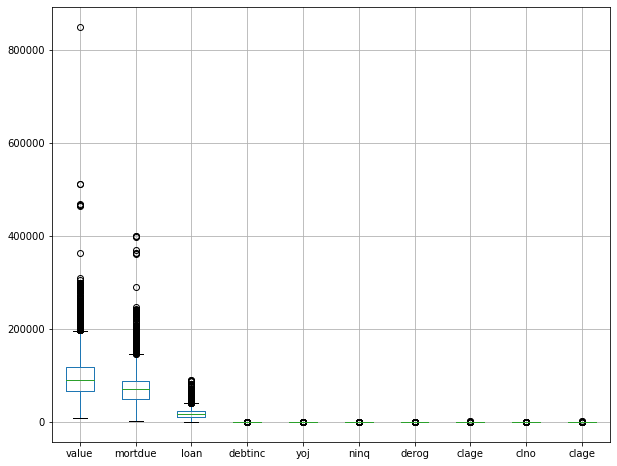

In [188]:
plt.figure(figsize=(10,8))
boxplot_df = data[["value", "mortdue" , "loan","debtinc","yoj","ninq","derog","clage","clno","clage"]]
boxplot_df.boxplot()
plt.show()

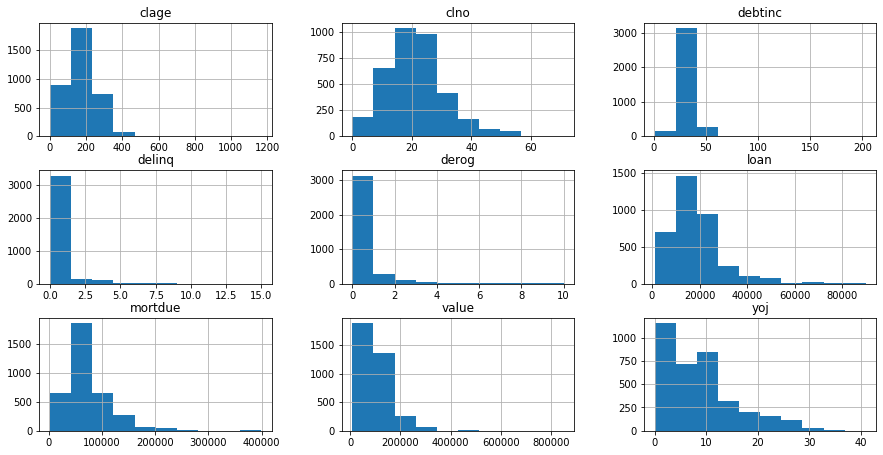

In [189]:
data_hist=data[["loan","clno",'mortdue', "derog","delinq","clage","value", "yoj", "debtinc"]]
data_hist.hist(bins=10,figsize=(15,7.5))
plt.show()

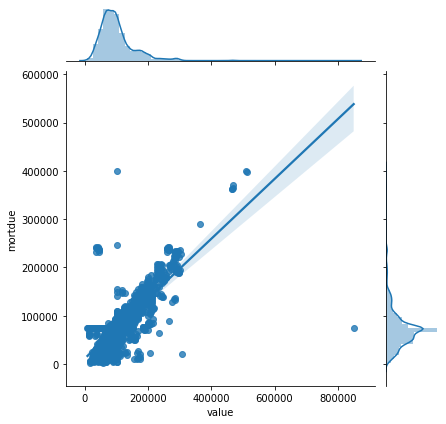

In [190]:
sns.jointplot(x=data['value'],y=data['mortdue'],kind='reg')

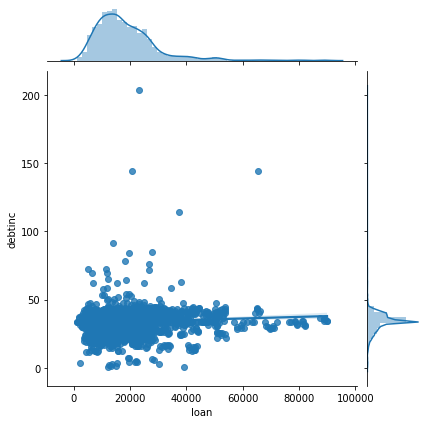

In [191]:
sns.jointplot(x=data['loan'],y=data['debtinc'],kind='reg')

In [192]:
y = data.bad    #değişkenlerin değerlerini saydırdık.
y = y.astype(object) 
count = pd.crosstab(index = y, columns="count")
percentage = pd.crosstab(index = y, columns="frequency")/pd.crosstab(index = y, columns="frequency").sum()
pd.concat([count, percentage], axis=1)

col_0,count,frequency
bad,,
0,2863,0.800615
1,713,0.199385


In [193]:
import pandas as pd
from pandas import Series, DataFrame
data=pd.read_csv("bankdata.csv")
data=data.copy()
data=data.dropna()

In [194]:
pd.crosstab(data["bad"], data["job"],normalize='index').style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.131522,0.177174,0.377174,0.273913,0.012500,0.027717
1,0.151685,0.123596,0.449438,0.196629,0.039326,0.039326


Burada kredi ödeyip ödememe durumunu mesleklere göre gösteren bir çapraz tablo çizildi.İncelediğimizde Other meslek grubunun %44 oranla en fazla borcunu ödemeyen meslek grubu olduğunu görüyoruz. 


In [195]:
pd.crosstab(data["bad"], data["job"],normalize='columns').style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.899628,0.936782,0.896641,0.935065,0.766667,0.879310
1,0.100372,0.063218,0.103359,0.064935,0.233333,0.120690


Bu tablo incelendiğinde, mesela sales meslek grubunda kredi borcu ödeme oranı %76 iken, Office ve ProfEx grubunda %93, Self grubunda %87’dir.


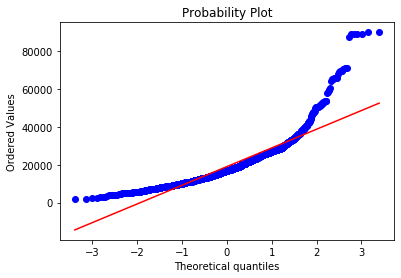

In [196]:
import scipy.stats as stats
import pylab
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["loan"], dist="norm", plot=pylab)
pylab.show()

Bu qq plot bize loan değişkeninin sağa çarpık olduğunu gösterir.Ortalama altında kalan verilerin frekansları gittikçe artacaktır.


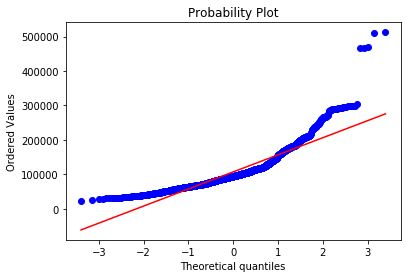

In [197]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["value"], dist="norm", plot=pylab)
pylab.show()

Burada verilerin daha düşük olduğunu ve sağa çarpık olduğunu gözlemleriz.Ayrıca bazı uç değerler gözlemleriz.


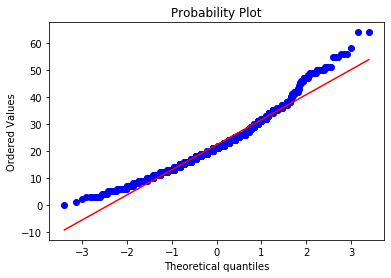

In [198]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["clno"], dist="norm", plot=pylab)
pylab.show()

Clno,bizlere kredi limit sayısını gösterir.Veriler arasında simetrik olmaya en yakın veri budur.


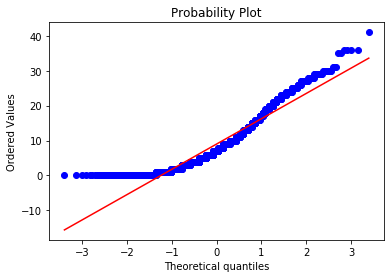

In [199]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["yoj"], dist="norm", plot=pylab)
pylab.show()

Bu değişken diğerlerine göre simetrik olmaya yakındır.Meslekte çalıuşılan yıl sayısı en fazla 0-20 bandındadır. 


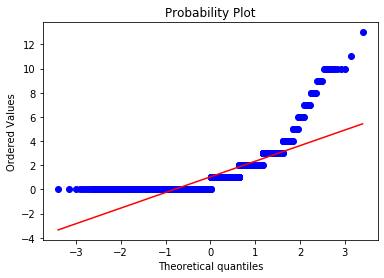

In [200]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["ninq"], dist="norm", plot=pylab)
pylab.show()

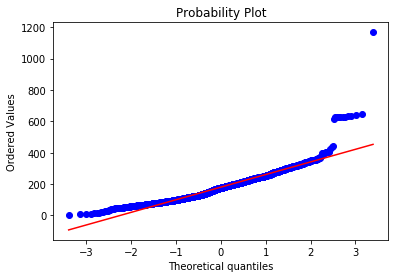

In [201]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(data["clage"], dist="norm", plot=pylab)
pylab.show()

En eski kredi limiti yaşını gösteriyor.Genelde 200 bandındadır.Ama az da olsa aykırı gözlemler bulunmaktadır.(1200)


In [202]:
vis_data=Visualization(data)

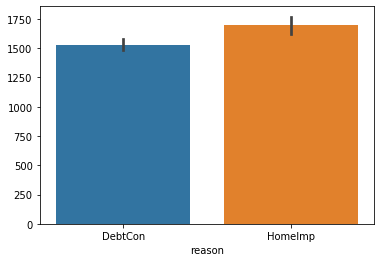

In [203]:
vis_data.barplot(x = "reason", y = data.reason.index)

**Kredinin kullanım amacını kullanan kişi sayısına göre gözlemledik.Reason değişkeni verideki kategorik değişkenlerden biridir ve çekilen kredinin Debtcon yani borçların birleşimi(diğer borçların kapatılması) veya HomeImp yani evdeki diğer harcamalar için kredi çekilmesini belirtir.


**Toplamda 3576 müşteriden yaklaşık olarak 1700 kişi krediyi HomeImp amacıyla, 1600 kişi de DebtCon amacıyla kredi çekmiştir.


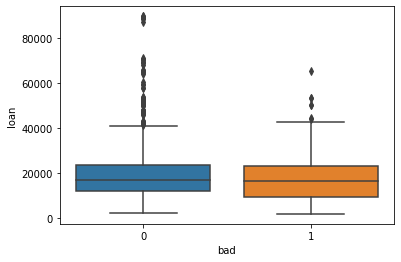

In [204]:
import seaborn as sns
sns.boxplot(x="bad", y="loan",data=data)

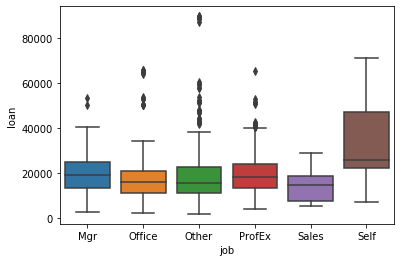

In [205]:
vis_data.boxplot(x = "job", y = "loan")

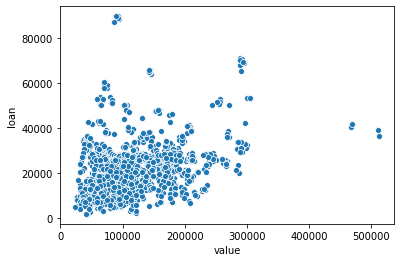

In [206]:
vis_data.scatter(x = "value", y = "loan")  

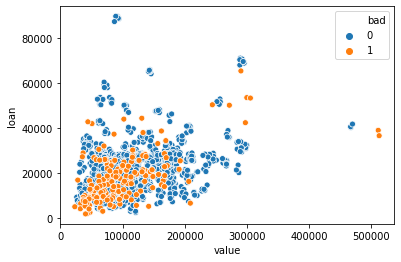

In [207]:
vis_data.scatter(x = "value", y = "loan", z = "bad")  

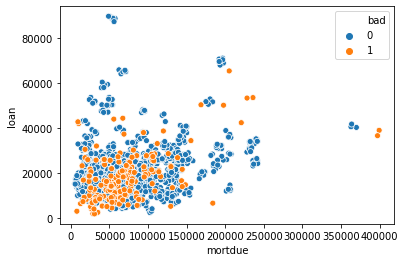

In [208]:
vis_data.scatter(x = "mortdue", y = "loan", z = "bad")  

In [209]:
data.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


**Burada verideki değişkenler arasındaki korelasyonu yani ilişkileri görüyoruz.

**Loan ve value arasında yüzde 38’lik bir ilişki vardır.Bu diğer değişken ilişkilerine göre fazladır.

**Value ve mortdue arasında yüzde 87’lik güçlü bir ilişki vardır.Value güncel mal varlığım ve mortdue morgage borçlarımı ifade ederse,mal varlığının morgage borcu yani ev kredisiyle oluşturulduğu yorumu yapılabilir.


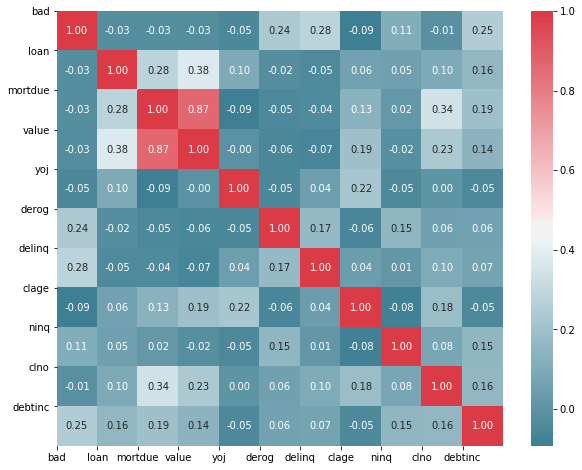

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [211]:
class PreProcessing:
    
    def __init__(self, data):
        self.data = data
    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col 
    def calc_vif(self):
        vif["variables"] = self.data.columns
        vif["VIF"] = [variance_inflation_factor(self.data.values, i) for i in range(self.data.shape[1])]
        return(vif)
    def Dummy(self):
        dummy_data = pd.get_dummies(self.data)
        return dummy_data
    def DropColumn(self, column):
        drop =  self.data.drop(column, inplace=True, axis=1)
        return drop
    def Label_Encoder(self, column):
        label_encoder = preprocessing.LabelEncoder()
        LE = label_encoder.fit_transform(self.data[column])
        return LE
    

In [212]:
class statistic():
    def __init__(self, data):
        self.data=data  
    def shapiro(self):
        for col in self.data.columns[1:]:
            if self.data[col].dtypes != object :
                stat, p = shapiro(self.data[col]) 
    def Delete_col(self, inplace):
        del_col = self.data.dropna(axis=1, inplace=inplace)
        return del_col
    
    def Delete_row(self, inplace):
        del_row = self.data.dropna(axis=0, inplace=inplace)
        return del_row
    def levene(self, col_1, col_2):
        stats.levene(self.data[col_1],self.data[col_2])
        print('Statistics=%.3f, p=%.3f' % (stat,p))             
    def ttest_one(self,column,popmean):
        stat, p = self.stats.ttest_one(self.data[column], popmean = popmean)
        print("Statistics:%3.3f, p=%.3f " % (stat,p))      
    def ttest_two(self, col_1, col_2):
        columns = pd.concat([self.data[col_1],self.data[col_2]], axis=1)
        stat, p=stats.ttest_ind(columns[col_1],columns[col_1], equal_var = False )
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        

# İstatistiksel Testler

In [213]:
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

data = pd.read_csv("bankdata.csv")

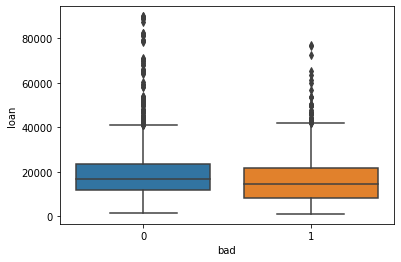

In [214]:
import seaborn as sns
sns.boxplot(x="bad", y="loan",data=data)

In [215]:
stat, p = stats.shapiro(data["loan"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:0.849, p=0.000 
örneklem normal dağılımdan gelmemektedir. (reject H0)


In [216]:
stats.levene(data["loan"], data["bad"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")

Statistics:0.849, p=0.000 
İki değişkenin varyansı birbirine eşit değildir. (reject H0)


In [333]:
stats.ttest_ind(data['loan'],data['bad'],equal_var=True) 

#H0 : İki değişkenin ortalamaları arasında anlamlı bir fark vardır.(Fail to reject)
#H1 : İki değişkenin ortalamaları arasında anlamlı bir fark yoktur.(Reject)

Ttest_indResult(statistic=79.30252724355316, pvalue=0.0)

*** Stat değeri > p-value -- H0 hipotezi reddedilir. (Reject)

*** Stat değeri < p-value -- H0 hipotezi kabul edilir.(Do not reject)

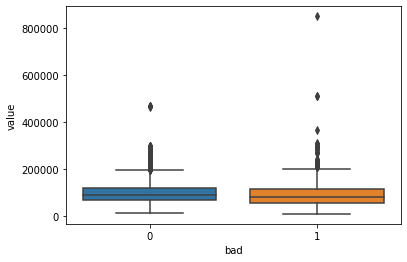

In [218]:
import seaborn as sns
sns.boxplot(x="bad", y="value",data=data)

In [219]:
stat, p = stats.shapiro(data["value"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:nan, p=1.000 
örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)


In [220]:
stats.levene(data["value"], data["bad"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")

Statistics:nan, p=1.000 
İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)


In [221]:
stats.ttest_ind(data['value'],data['bad'],equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

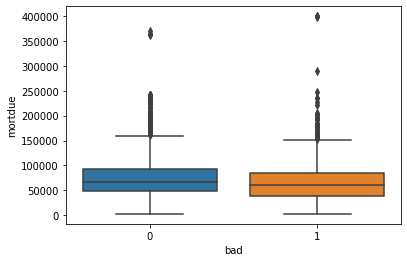

In [222]:
import seaborn as sns
sns.boxplot(x="bad", y="mortdue",data=data)

In [223]:
stat, p = stats.shapiro(data["mortdue"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)")
else:
  print("örneklem normal dağılımdan gelmemektedir. (reject H0)")

Statistics:nan, p=1.000 
örneklem normal dağılımdan gelmektedir. (Fail to Reject H0)


In [224]:
stats.levene(data["mortdue"], data["bad"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")

Statistics:nan, p=1.000 
İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)


In [225]:
stats.ttest_ind(data['mortdue'],data['bad'],equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [226]:
stats.levene(data["mortdue"], data["value"])  #Varyansların eşit olup olmadığını anlamak için.

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
  print("İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)")
else:
  print("İki değişkenin varyansı birbirine eşit değildir. (reject H0)")

Statistics:nan, p=1.000 
İki değişkenin varyansı birbirine eşittir.(Fail to Reject H0)


In [227]:
stats.ttest_ind(data['mortdue'],data['value'],equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

*** Stat değeri > p-value -- H0 hipotezi reddedilir. (Reject)

*** Stat değeri < p-value -- H0 hipotezi kabul edilir.(Do not reject)

# Dummy

In [228]:
data = pd.read_csv("hmelq.csv")
data = data.dropna()

In [229]:
col=data.columns

num_cols=data._get_numeric_data().columns
cat=set(col)-set(num_cols)
cat

{'job', 'reason'}

In [230]:
cat = data.select_dtypes(include='object')
cat 

,reason,job
153,DebtCon,Mgr
154,DebtCon,Mgr
155,DebtCon,Mgr
156,HomeImp,Mgr
157,DebtCon,Mgr
...,...,...
3544,HomeImp,Self
3546,HomeImp,Self
3547,DebtCon,Self
3548,HomeImp,Self


In [231]:
data["bad"].value_counts() 

0    1840
1     178
Name: bad, dtype: int64

1840 kişi borcunu ödüyor. 178 kişi borcunu ödemiyor.

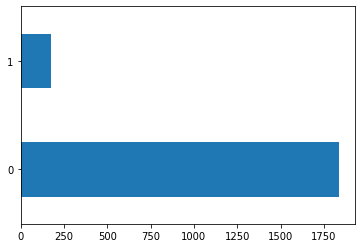

In [232]:
data["bad"].value_counts(). plot.barh(); 

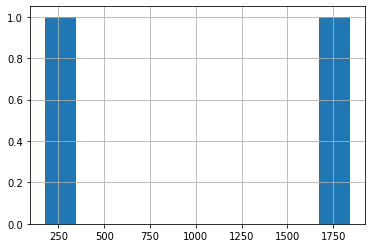

In [233]:
data["bad"].value_counts(). hist()

# Logistic Regression

## STATS MODEL

In [234]:
dummy_data = pd.get_dummies(data[["job","reason"]])

In [235]:
y = data["bad"]
X_=data.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dummy_data[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)


In [236]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [237]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.238483
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2007
Time:                        16:57:34   Log-Likelihood:                -481.26
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 6.349e-43
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.625e-05   1.07e-05     -2.453      0.014   -4.72e-05   -5.27e-06
mortdue        -4.837e-06   4.98e-06     -0.972      0.331   -1.46e-05    4.91e-06
value           1.216e-07   4.35e-06      0.028      0.978   -8.41e-06    8.66e-06
yoj               -0.0145      0.013     -1.114      0.265      -0.040       0.011
derog              0.5742      0.131      4.388      0.000       0.318       0.831
delinq             0.7806      0.091      8.595      0.000       0.603       0.959
clage             -0.0066      0.001     -4.898      0.000      -0.009      -0.004
ninq               0.0919      0.048      1.916      0.055      -0.002       0.186
clno              -0.0369      0.011     -3.488      0.000      -0.058      -0.016
debtinc            0.0704      0.010      6.833      0.000       0.050       0.091
job_Mgr           -2.4682      0.364     -6.774      0.000      -3.182      -1.754
job_Office        -3.0527      0.381     -8.013      0.000      -3.799      -2.306
job_Other         -2.6848      0.317     -8.457      0.000      -3.307      -2.063
job_ProfEx        -2.5181      0.336     -7.494      0.000      -3.177      -1.860
job_Sales         -1.3558      0.620     -2.187      0.029      -2.571      -0.141
reason_DebtCon    -0.0854      0.193     -0.443      0.658      -0.463       0.292
==================================================================================
"""

# SKICIT-LEARN

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [240]:
loj_model.intercept_

array([-0.00285605])

In [241]:
loj_model.coef_         

array([[-3.49691167e-05, -7.16713527e-06, -1.60427118e-06,
        -1.94055835e-02,  7.26357556e-03,  1.30146133e-02,
        -8.70461218e-03,  4.57096761e-03, -1.86652104e-02,
         2.88082095e-02, -1.82954173e-05, -1.46433929e-03,
        -1.56801540e-03, -7.14584809e-04,  4.09978914e-04,
        -1.89872893e-03]])

### Model Tuning

In [242]:
y_pred = loj_model.predict(X)

In [243]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 177,    1]], dtype=int64)

In [244]:
accuracy_score(y, y_pred) 

0.9098116947472745

In [245]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.17      0.01      0.01       178

    accuracy                           0.91      2018
   macro avg       0.54      0.50      0.48      2018
weighted avg       0.85      0.91      0.87      2018



In [246]:
loj_model.predict(X)[0:10]    

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [247]:
loj_model.predict_proba(X)[0:10][:, 0:2]  

array([[0.93928795, 0.06071205],
       [0.81289141, 0.18710859],
       [0.98769846, 0.01230154],
       [0.83440307, 0.16559693],
       [0.82255489, 0.17744511],
       [0.98390262, 0.01609738],
       [0.85364356, 0.14635644],
       [0.96562477, 0.03437523],
       [0.74981367, 0.25018633],
       [0.96062034, 0.03937966]])

In [248]:
#Gerçek y
y[0:10]  

153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
Name: bad, dtype: int64

In [249]:
y_probs = loj_model.predict_proba(X)

In [250]:
y_probs = y_probs[:,1]

In [251]:
y_probs[0:10]   

array([0.06071205, 0.18710859, 0.01230154, 0.16559693, 0.17744511,
       0.01609738, 0.14635644, 0.03437523, 0.25018633, 0.03937966])

In [319]:
y_pred = [1 if i > 0.25 else 0 for i in y_probs]  

In [320]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [321]:
confusion_matrix(y, y_pred)

array([[1744,   96],
       [ 131,   47]], dtype=int64)

In [322]:
accuracy_score(y, y_pred)

0.8875123885034688

In [323]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1840
           1       0.33      0.26      0.29       178

    accuracy                           0.89      2018
   macro avg       0.63      0.61      0.62      2018
weighted avg       0.88      0.89      0.88      2018



In [324]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05964642, 0.18818104, 0.03606943, 0.18185406, 0.13272884])

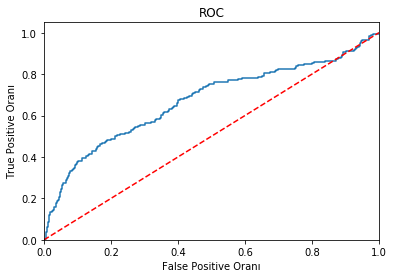

In [325]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])  #Tahmin ettiğim ve gerçek x ler ile ROC Curve çizdirdik.

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [326]:
logit_roc_auc   

0.4986413043478261

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [328]:
loc = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [329]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9133663366336634

In [330]:
y_pred = loj_model.predict(X_test)

In [331]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



In [332]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9158536585365855